# Práctica 6 - Modularidad e Identificación de Comunidades

## Objetivo
En esta práctica se propone implementar en una función para el cálculo de la modularidad de una red, y posteriormente implementar el algoritmo de Girvan-Newman para la partición de una red mediante la eliminación sucesiva de los enlaces de mayor betweenness.
## 1 Modularidad
### 1.1 Implementar una función que calcula la modularidad de una red no dirigida para una partición de los nodos propuesta. 
La función tendrá como argumentos de entrada:
- Un objeto Graph (Networkx)
- Un diccionario con la partición, e.g. { ‘node1’: c1, ‘node2’:c2, …}



In [134]:
#Imports
import networkx as nx
from itertools import product
from networkx.algorithms import community

import numpy as np
import matplotlib.pyplot as plt

Función que calcula la modularidad de una red ND para una particion de nodos.

In [135]:
def calcularModularidad(red, diccionario):
    Q = 0
    m = red.number_of_edges()
    out_degree = in_degree = dict(nx.degree(red))
    nodos = list(red)
    
    # Calcula la matriz de adyacencia
    A = nx.adjacency_matrix(red)
    
    for i, j in product(range(len(nodos)),range(len(nodos))):
        if (diccionario[nodos[i]] == diccionario[nodos[j]]):
            Q += A[i,j] - (in_degree[nodos[i]]*out_degree[nodos[j]]/(2*m))

    return Q / (2*m)

### 1.2 Comprobar el valor de la modularidad para los siguientes ejemplos:
##### 1 Ejemplo de Wikipedia 
Modularidad de la partición de colores = 0.4896


In [136]:
# Creamos el grafo de la red de contactos propuesta
G = nx.Graph()
# Agregamos los nodos
G.add_edges_from([(1,2),(1,3),(3,2),(1,4),(4,5),(5,6),(6,7),(7,5),(4,8),(8,9),(9,10),(10,8)])

def definicionGrafo():
    # Creamos el diccionario de nodos
    nodos = list(G)
    diccionario = {}
    for e in nodos:
        if e <= 4:
            diccionario[e] = 1
        elif 5 <= e <= 8:
            diccionario[e] = 2
        else:
            diccionario[e] = 3

    return G, diccionario

La modularidad de la red es: 0.2916666666666666


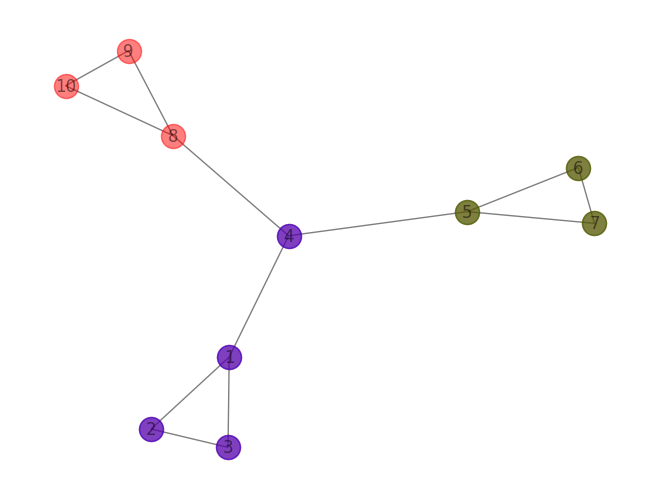

In [137]:
red, nodos = definicionGrafo()

pos = nx.fruchterman_reingold_layout(red,k=0.25)
nx.draw(red, pos, with_labels=True, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(red, pos, nodelist=[1,2,3,4], node_color='b', alpha=0.5)
nx.draw_networkx_nodes(red, pos, nodelist=[5,6,7], node_color='g', alpha=0.5)

print("La modularidad de la red es:", calcularModularidad(red, nodos))

##### 2 Ejemplo de clase #####

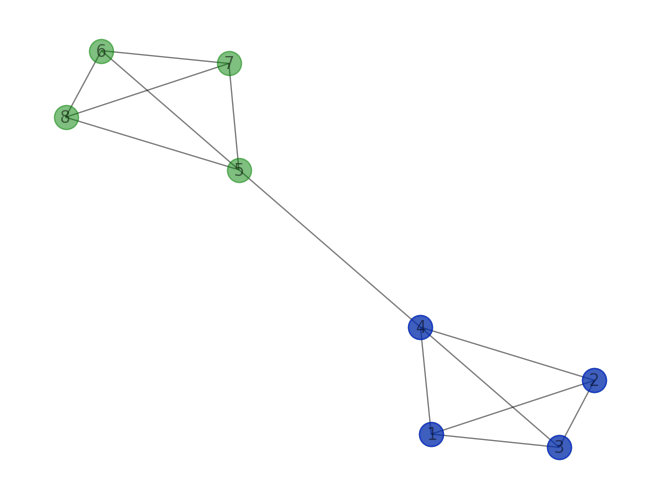

In [138]:
def definicionGrafo2():
    G = nx.Graph()
    G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),(4,5),(5,6),(5,7),(5,8),(6,7),(6,8),(7,8)])
    pos = nx.fruchterman_reingold_layout(G,k=0.25)
    nx.draw(G, pos, with_labels=True, node_color='g', alpha=0.5)
    nx.draw_networkx_nodes(G, pos, nodelist=[1,2,3,4], node_color='b', alpha=0.5)

    return G

red2 = definicionGrafo2()

1. Para una partición correspondiente a toda la red (modularidad = 0)

In [139]:
nodos = list(red2)
diccionario = {}
for e in nodos:
    diccionario[e] = 1

print("La modularidad es:", round(calcularModularidad(red2, diccionario))) 

La modularidad es: 0


2. Para una partición correspondiente a cada nodo (modularidad = -0.1272)

In [140]:
diccionario2 = {}
num = 1
for e in nodos:
    diccionario2[e] = num
    num += 1   

print("La modularidad es:", round(calcularModularidad(red2, diccionario2),4))

La modularidad es: -0.1272


3. Para la partición de colores (modularidad = 0.4231)

In [141]:
diccionario3 = {}
for e in nodos:
    if e <= 4:
        diccionario3[e] = 1
    else:
        diccionario3[e] = 2

print("La modularidad es:", round(calcularModularidad(red2, diccionario3),4))

La modularidad es: 0.4231


## 2 Detección de comunidades basada en la eliminación de enlaces
### 2.1 Implementar la detección de comunidades basada en la eliminación recursiva de enlaces “shortest-path betweenness” propuesta por Newman y Girvan

In [142]:
# Actualizamos el diccionario
def actualizarDicc(A,nodos):
    dicc = {}
    B = A.sum(axis=1)  
    i = 0
    for nodo in list(nodos):
        dicc[nodo] = B[i]
        i += 1
    return dicc

In [143]:
# Definición de la función calcularModularidadGirvanNewman
def calcularModularidadGirvanNewman(copia):
    # Calcula la matriz de adyacencia
    A = nx.adjacency_matrix(copia)
    diccAuxiliar = {}
    diccAuxiliar = actualizarDicc(A, copia.nodes())

    Q = calcularModularidad(copia,diccAuxiliar)
    return Q

In [144]:
# Ejecutamos el algoritmo
diccModularidad = {}
mejorParticion = 0
maxModularidad = 0
copia = G.copy()
nPart= 0

# Variable para encontrar la mejor partición
maxModularidad = 0.0
Q = 0.0
while True:
    m=G.number_of_edges()
    conectados = nx.number_connected_components(G)
    ncomponentes = conectados
    while ncomponentes <= conectados:
        centralidadIn = nx.edge_betweenness_centrality(G,weight='peso')

        # Verifica si centralidadIn está vacío
        if centralidadIn:
            # Buscamos el borde con mayor centralidad
            maximo = max(centralidadIn.values())

            for j,i in centralidadIn.items():
                if float(i) == maximo:
                    G.remove_edge(*j)
        else:
            break

    if m == 0:
        break

    Q = calcularModularidadGirvanNewman(copia,diccModularidad,m)
    nPart =  nPart + 1
    diccModularidad[nPart] = Q

for key, value in diccModularidad.items():
    if value > maxModularidad:
        maxModularidad = value
        mejorParticion = key

print("La mejor partición es:", mejorParticion)

La mejor partición es: 1


Mostrar un gráfico con la modularidad vs el número de particiones

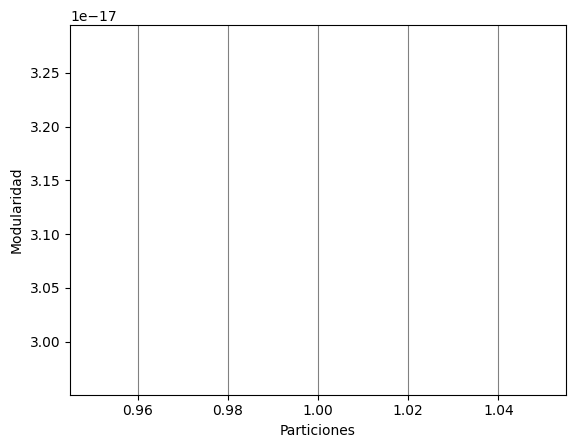

In [145]:
particiones = []
modularidad = []

for key, value in diccModularidad.items():
    particiones.append(key)
    modularidad.append(value)

fig, ax = plt.subplots()
ax.set_xlabel('Particiones')
ax.set_ylabel('Modularidad')
ax.plot(particiones, modularidad)
ax.grid(axis = 'x', color = 'gray')
plt.show()

### 2.2 Comprobar el algoritmo de detección de comunidades anterior con la red “Zachary’s karate club” que se encuentra dentro de la librería de Networkx.


In [146]:
G = nx.karate_club_graph()
copia = G.copy()
n = G.number_of_nodes()
A = nx.adjacency_matrix(G)

# Peso de los bordes
peso = 0.0
for i in range(0, n):
    for j in range(0, n):
        peso += A[i,j]
peso = peso/2.0

# Grafo de cada nodo
diccionario = actualizarDicc(A, G.nodes())

# Ejecutamos el algoritmo
mejorParticion = 0
maxModularidad = 0

# Variable para encontrar la mejor partición
maxModularidad = 0.0
Q = 0.0
while True:
    conectados = nx.number_connected_components(G)
    ncomponentes = conectados
    while ncomponentes <= conectados:
        centralidadIn = nx.edge_betweenness_centrality(G,weight='peso')

        # Buscamos el borde con mayor centralidad
        maximo = max(centralidadIn.values())

        for j,i in centralidadIn.items():
            if float(i) == maximo:
                G.remove_edge(*j)
            
        ncomponentes = nx.number_connected_components(G)
        
    if G.number_of_edges() == 0:
        break

    Q = calcularModularidadGirvanNewman(copia)
    

for key, value in diccModularidad.items():
    if value > maxModularidad:
        maxModularidad = value
        mejorParticion = key
       

print("La particion con maximo valor de modularidad es:", mejorParticion) #MAL

La particion con maximo valor de modularidad es: 1


Mostrar un gráfico con la modularidad vs el número de divisiones

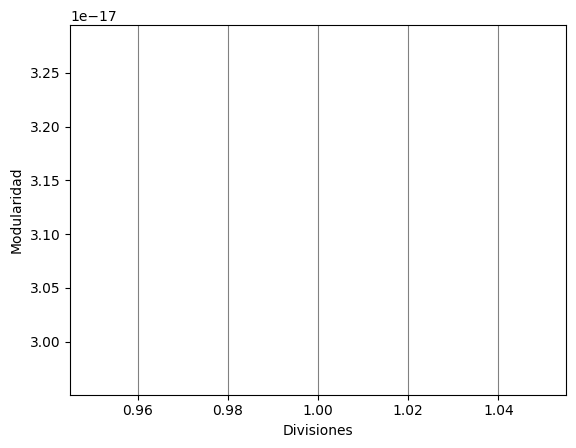

In [147]:
divisiones = []
modularidad = []

for key, value in diccModularidad.items():
    divisiones.append(key)
    modularidad.append(value)

fig, ax = plt.subplots()
ax.set_xlabel('Divisiones')
ax.set_ylabel('Modularidad')
ax.plot(divisiones, modularidad)
ax.grid(axis = 'x', color = 'gray')
plt.show()